# **Special Data Processing Assign. 2 : Heart Disease Prediction**

## **Motivation**

The researchers themselves assert that without big data and artificial intelligence, they would have never linked certain molecules together, and therefore, they would have never discovered drugs that are on the market today. 
The need of the researchers combined to our determination to make evolve the noblest of sectors led us to work on heart disease prediction.

## **About the data**

### **Context**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### **Content**
The columns and their descriptions of our dataset, which consists of 70,000 observation units, are as follows:

1. id -> Unique identifier for each person | Objective Feature
2. age -> Age (day) | Objective Feature
3. gender -> Gender | Objective Feature
4. height -> Height (cm) | Objective Feature
5. weight -> Weight (kg) | Objective Feature
6. ap_hi -> Systolic blood pressure (mm Hg) | Examination Feature 
7. ap_lo -> Diastolic blood pressure (mm Hg) | Examination Feature
8. cholesterol -> Cholesterol level in the blood (total) | Examination Feature
9. gluc -> Blood glucose level | Examination Feature
10. smoke -> Smoking status | Subjective Feature
11. alco -> Alcohol consumption status | Subjective Feature
12. active -> Physical activity | Subjective Feature
13. cardio -> Presence/Absence of cardiovascular disease -> Target

Let's start by importing librairies we'll use for our work.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import time
from tqdm import tqdm

In [2]:
warnings.filterwarnings("ignore")

## **Data Analyzing**

In [3]:
data = pd.read_csv('cardio_train.csv', sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

Our dataset contains 11 features (without the *'id'* and *'cardio'* that is the target) explained in the introduction paragraph and 70000 examples. 

In [5]:
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.42,28851.30,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.87,2467.25,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.35,0.48,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.36,8.21,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.21,14.40,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.82,154.01,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.63,188.47,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.37,0.68,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.23,0.57,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.09,0.28,0.0,0.00,0.0,0.00,1.0


The `.describe()` function allows us to get many informations about our data, especially for the quantitative variables such as *'age'*, *'height'*, *'cholesterol'*...

In [6]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

We checked if we are fading any missing values. The answer is no !

We distinguish two types of variables :
- **quantitative variables** : these variables or number on which we can apply basic mathematical operations such *addition*, *multiplication*, *mean*, *standard deviation*...
- **qualitative variables** : these variables defined categories. They could not be subjected to basic mathematical operations.

quantitative variables = ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']
<br>qualitative variables = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [7]:
def cat_summary(col_name, plot=False):
    """
    Input : 
        - col_name : string representig the name of a categorical variable
        - plot : True = print barplot / False = not print barplot
    Output : 
        - print proportion and percentage of each category in each variable
        - print barplot
    """
    temp = pd.DataFrame(data[col_name].value_counts()).reset_index()
    temp['ratio'] = round(100 * temp['count'] / len(data),2)
    print(temp.to_string(index=False))

    if plot:
        sns.countplot(x=data[col_name], data=data)
        plt.show()
        
quant_v = ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']
qual_v = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

for v in qual_v:
    print('-------',v,'-------')
    cat_summary(v)
    print()

------- gender -------
 gender  count  ratio
      1  45530  65.04
      2  24470  34.96

------- cholesterol -------
 cholesterol  count  ratio
           1  52385  74.84
           2   9549  13.64
           3   8066  11.52

------- gluc -------
 gluc  count  ratio
    1  59479  84.97
    3   5331   7.62
    2   5190   7.41

------- smoke -------
 smoke  count  ratio
     0  63831  91.19
     1   6169   8.81

------- alco -------
 alco  count  ratio
    0  66236  94.62
    1   3764   5.38

------- active -------
 active  count  ratio
      1  56261  80.37
      0  13739  19.63

------- cardio -------
 cardio  count  ratio
      0  35021  50.03
      1  34979  49.97



In [8]:
data[data.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


There is no duplicat.

Let's use `ydata_profiling` to have a full summary of the dataset and the distribution of each variables. The documentation of this library is available [here](https://github.com/ydataai/ydata-profiling).

In [9]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(data, title="Pandas Profiling Report")
# profile

## **Data Processing & Visualization**

We noticed many details that we can improve to make our work more understandable.

In [10]:
# Set the target
TARGET = 'cardio'

In [11]:
# Drop the id column as it is not relevant for our prediction
data.drop("id", axis=1, inplace=True)

# Convert age from days into years
data['age'] = data['age'] // 365

# Set the gender to 0 for female and 1 for male
data['gender'] = np.where(data['gender'] == 1, 0, 1)

Let's check the distribution of male and female in our dataset.

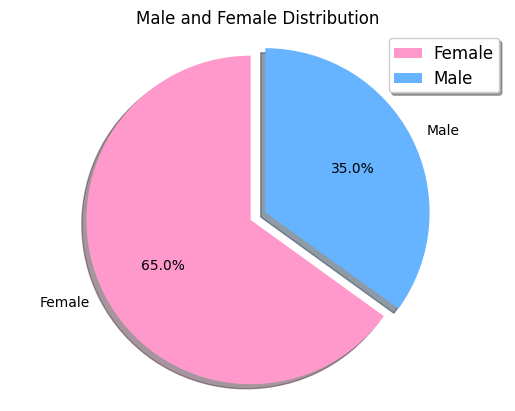

In [12]:
# Create a copy of the original data to avoid modifying the original dataset
data_copy = data.copy()

# Replace gender values 0 with 'Female' and 1 with 'Male' in the copied data
data_copy['gender'].replace({0: 'Female', 1: 'Male'}, inplace=True)

# Count the occurrences of each gender in the copied data
gender_counts = data_copy['gender'].value_counts()

labels = ['Female', 'Male']

# Specify colors for each gender in the pie chart
colors = ['#ff99cc', '#66b3ff']

# Specify the degree of separation (explode) for each slice in the pie chart
explode = [0.1, 0]

# Create a pie chart 
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)

# Set the aspect ratio of the pie chart to be equal
ax.axis('equal')

# Set the title of the pie chart
ax.set_title('Male and Female Distribution')

# Add a legend to the pie chart with specified location and shadow
legend = ax.legend(loc='upper right', shadow=True)

# Set the font size of legend texts
for text in legend.get_texts():
    text.set_fontsize(12)

# Display the pie chart
plt.show()


Let's now check the distribution of the Age for the target. It wwill give us clue on the correlation of Age on the target.

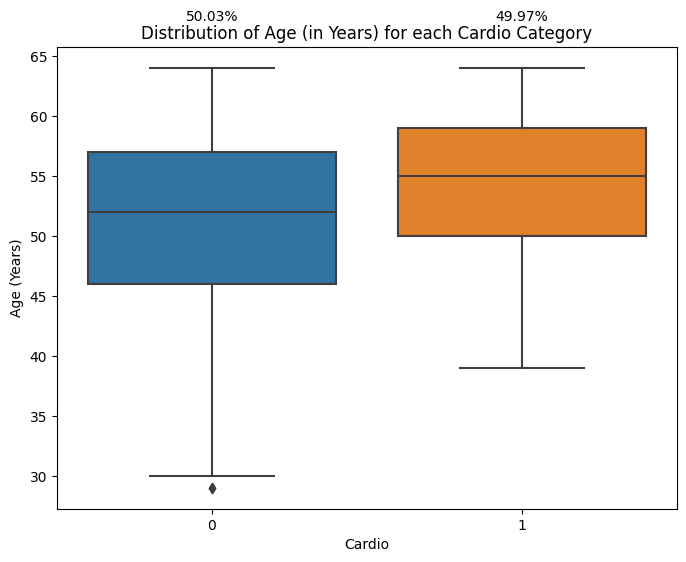

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age', data=data)

plt.xlabel('Cardio')
plt.ylabel('Age (Years)')
plt.title('Distribution of Age (in Years) for each Cardio Category')

# Percentage of distribution
percentage_data = data['cardio'].value_counts(normalize=True) * 100

for i, percentage in enumerate(percentage_data):
    plt.text(i, 1.05, f'{percentage:.2f}%', ha='center', va='bottom', transform=plt.gca().get_xaxis_transform())

plt.show()

We can infer that age does have an influence on the target, albeit a subtle one.

Now, let's check the distribution of other variables to know better how our dataset was built.

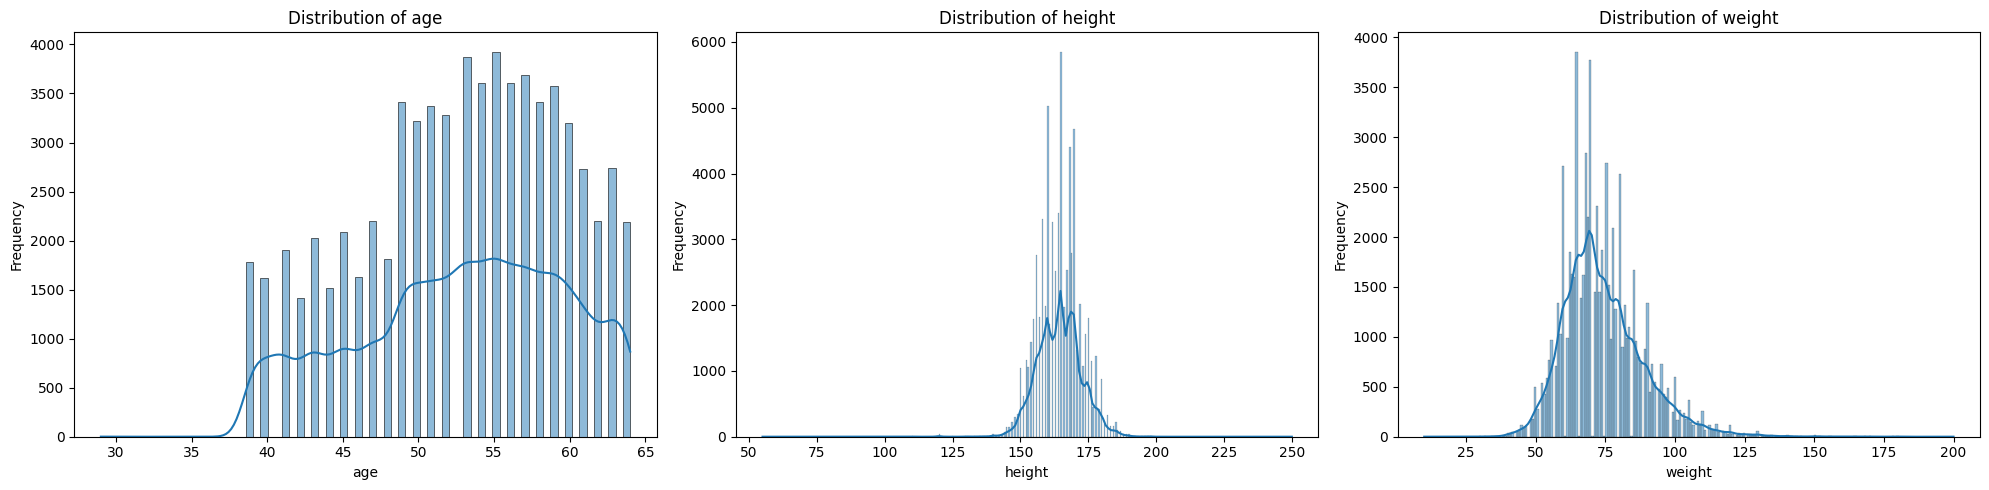

In [14]:
# List of numerical features
numerical_features = ['age', 'height', 'weight']

# Create a figure with 3 subplots stacked vertically
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Iterate over each numerical feature
for i, feature in enumerate(numerical_features):
    # Use the current axis for each subplot
    sns.histplot(data[feature], kde=True, ax=axes[i])
    
    '''
    When kde=True, in addition to the histogram of the data, 
    Seaborn will also plot a smooth curve that estimates the 
    shape of the underlying probability distribution of the data.
    '''
    
    # Add titles and labels to the axes
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with the subplots
plt.show()


We noticed that one new interesting feature for our models would be the `BMI`. 

**BMI** (Body Mass Index) is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}
$$

Where:
- *weight* is the person's weight in kilograms.
- *height* is the person's height in meters.


In [15]:
data['BMI'] = data['weight'] / (data['height'] / 100) ** 2

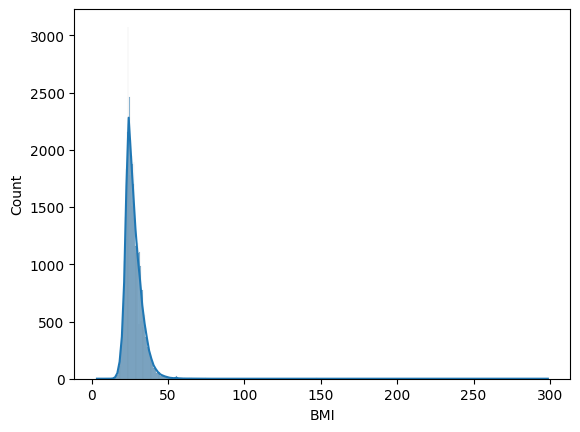

In [16]:
sns.histplot(data['BMI'], kde=True)
plt.show()

These distributions allowed us to identify some outliers in our data. It would have a negative impact for our models if we keep them...

#### **Outliers**

We are seeking outliers in dataset to identify values that deviate from the norm. Outliers can indicate data collection errors, data quality issues, or valuable insights into unusual cases or unexpected trends. By identifying them, we enhance the quality of our statistical analyses, detect potential anomalies, and identify intriguing research avenues within the context of cardiovascular diseases.



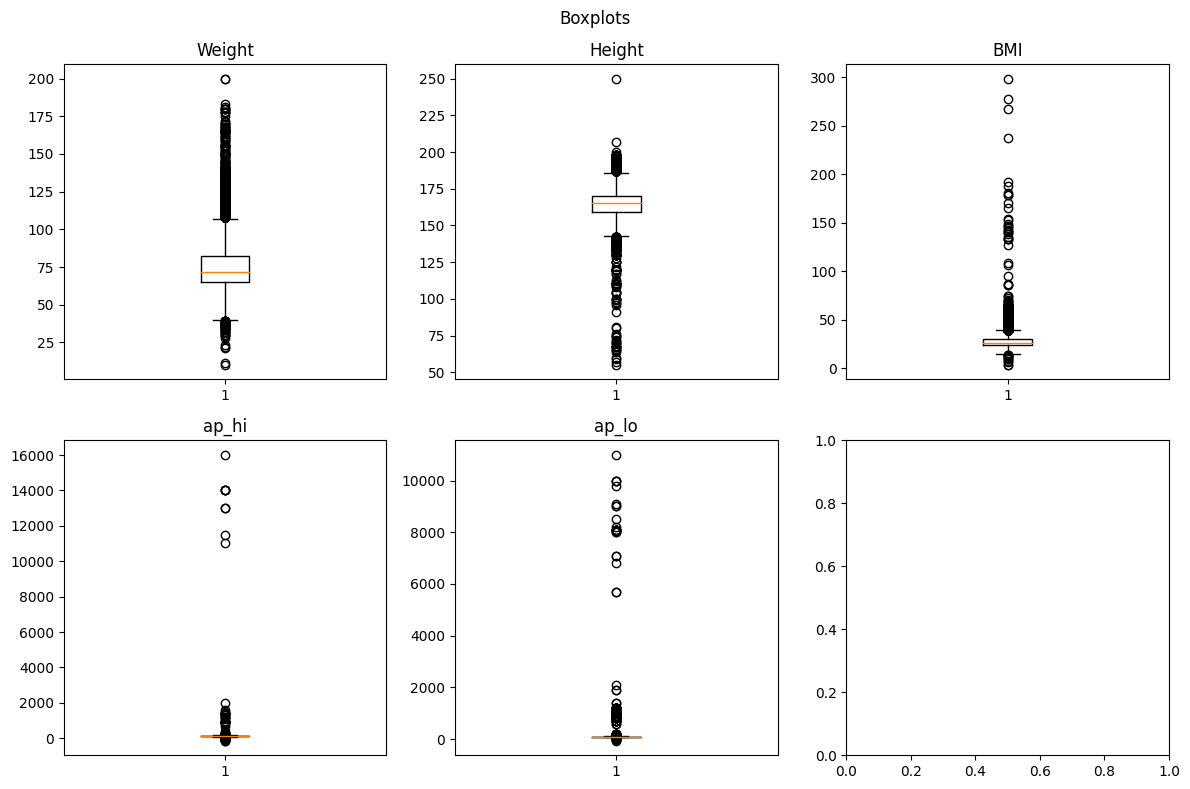

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].boxplot(data['weight'])
axes[0, 0].set_title('Weight')
axes[0, 1].boxplot(data['height'])
axes[0, 1].set_title('Height')
axes[0, 2].boxplot(data['BMI'])
axes[0, 2].set_title('BMI')

axes[1, 0].boxplot(data['ap_hi'])
axes[1, 0].set_title('ap_hi')
axes[1, 1].boxplot(data['ap_lo'])
axes[1, 1].set_title('ap_lo')

fig.suptitle('Boxplots')

plt.tight_layout()

plt.show()

In [18]:
def remove_outliers(data, col_names):
    """
    Remove outliers from the specified columns in the dataset using Z-score method (threshold = 3).

    Parameters:
    - data: pandas DataFrame, the dataset to be processed.
    - col_names: list of strings, names of columns to remove outliers from.

    Returns:
    - pandas DataFrame: a copy of the dataset with outliers removed.

    Explanation:
    Outliers are detected using Z-scores. If a data point within the specified columns has a Z-score greater than 3, 
    it is considered an outlier and is removed from the dataset.
    """

    data_copy = data.copy()  # Create a copy of the dataset

    for col_name in col_names:  # Iterate through each specified column
        flag = True  # Set a flag to control the loop

        while flag:  # Continue until no outliers are found in the column
            z_scores = np.abs(stats.zscore(data_copy[col_name]))  # Calculate Z-scores for the column

            if len(np.where(z_scores > 3)[0]) > 0:  # If outliers (Z-score > 3) are found
                data_copy = data_copy[(z_scores < 3)]  # Remove the outliers from the dataset copy
            else:
                flag = False  # Set flag to False to exit the loop when no outliers are detected

    return data_copy  # Return the dataset with outliers removed


data_wout_oulier = remove_outliers(data, ['weight', 'height', 'BMI', 'ap_hi', 'ap_lo'])

print(f'Shape of the original dataset : {data.shape}\n'
      f'Shape of the new dataset : {data_wout_oulier.shape}')


Shape of the original dataset : (70000, 13)
Shape of the new dataset : (65224, 13)


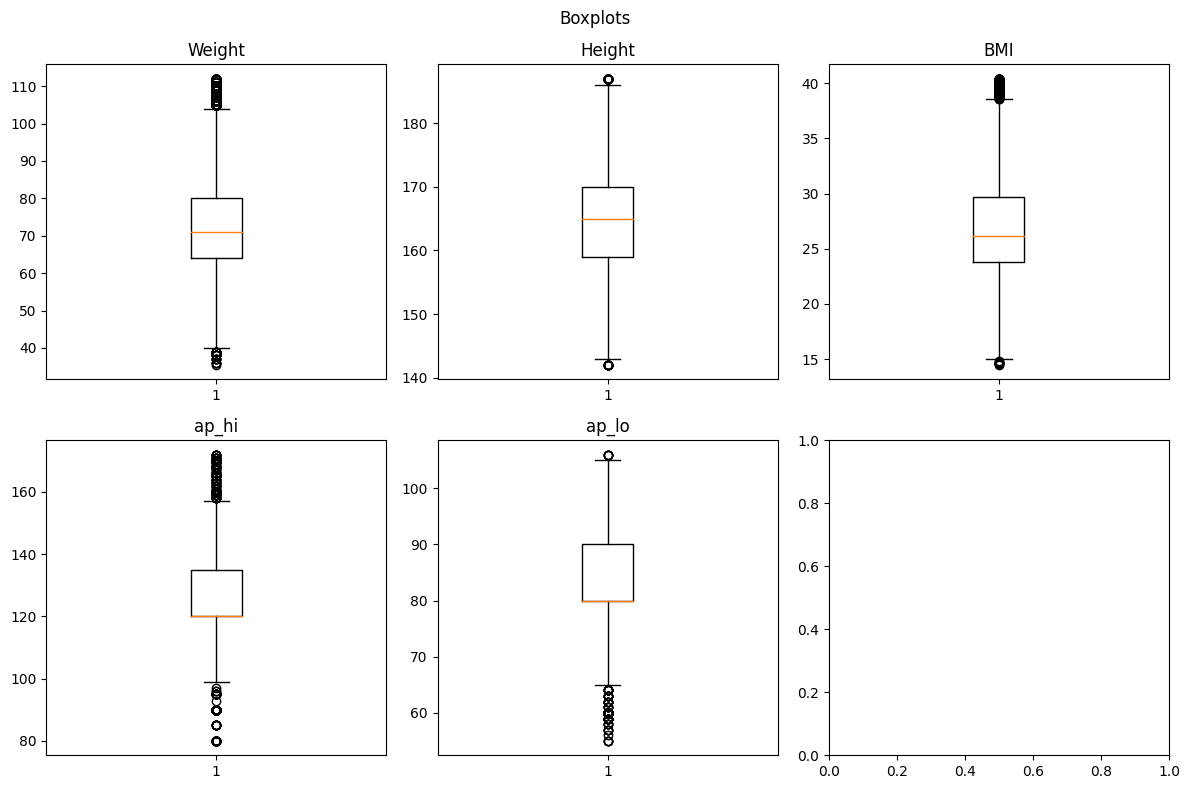

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].boxplot(data_wout_oulier['weight'])
axes[0, 0].set_title('Weight')
axes[0, 1].boxplot(data_wout_oulier['height'])
axes[0, 1].set_title('Height')
axes[0, 2].boxplot(data_wout_oulier['BMI'])
axes[0, 2].set_title('BMI')

axes[1, 0].boxplot(data_wout_oulier['ap_hi'])
axes[1, 0].set_title('ap_hi')
axes[1, 1].boxplot(data_wout_oulier['ap_lo'])
axes[1, 1].set_title('ap_lo')

fig.suptitle('Boxplots')

plt.tight_layout()

plt.show()

We would like to know now which features we must use to train our models. We will plot several graphs to understand what are the distributions and the correlation with other variables.

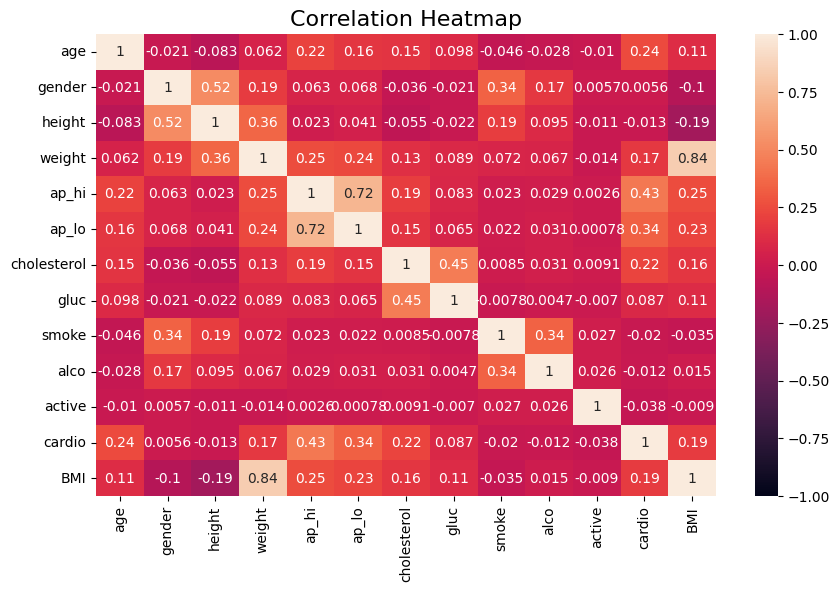

In [20]:
cor = data_wout_oulier.corr()
plt.figure(figsize=(10, 6))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True) 
sns.heatmap(cor, annot=True, vmin=-1, vmax=1)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

We can now choose the most relevant variables for our prediction : `age`, `weight`, `ap_hi`, `ap_lo`, `cholesterol`, `BMI`.

These ones have the biggest correlation with `cardio` that is our target.

Here we could wonder why being a smoker or not is not correlated to have a cardiovascular disease... Based on our current knowledge, the two variables should be related. Let's check it deeper.


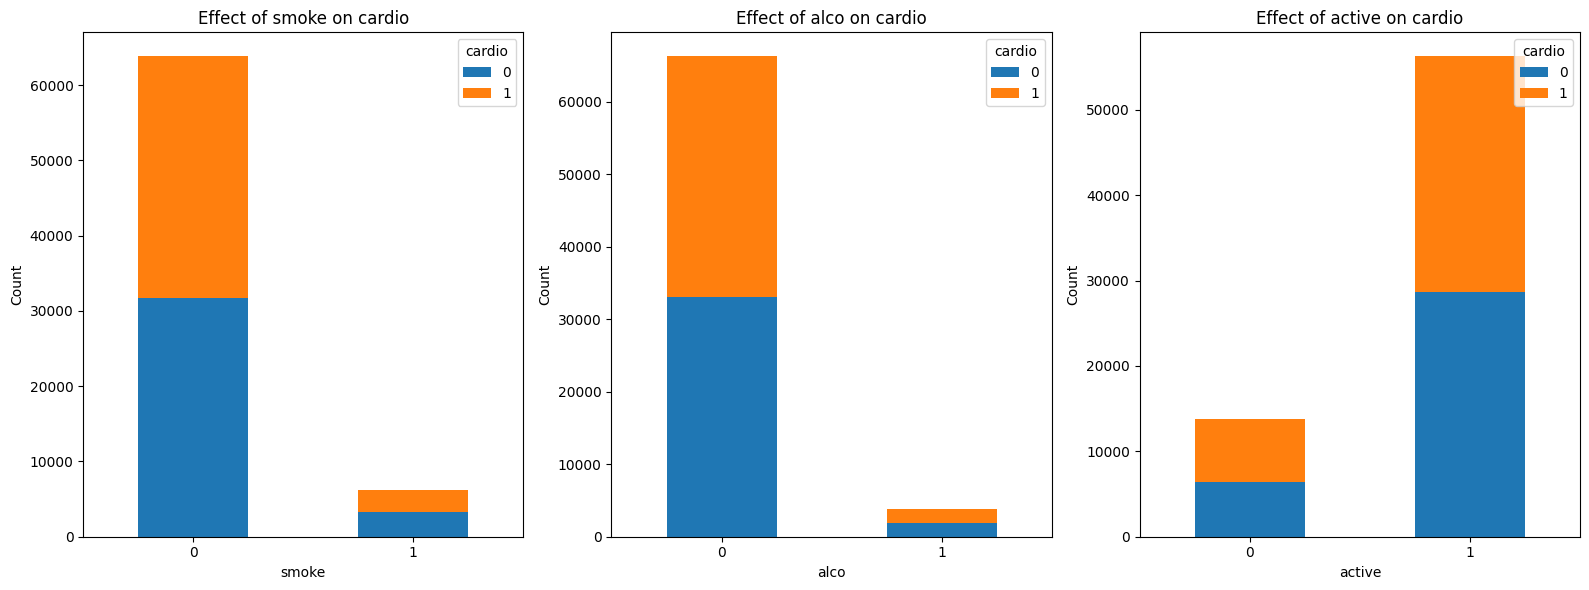

In [21]:
col = ['smoke', 'alco', 'active']

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i, feature in enumerate(col):
    # Group the data depending on the feature and the target
    grouped = data_wout_oulier.groupby([feature, 'cardio']).size().unstack() # Create a pivot table using unstack() to reshape the data

    # Get the current subplot (axis) for the current feature in the loop
    axe = axes[i]

    # Set up the stacked bar chart using the grouped data
    grouped.plot(ax=axe, kind='bar', stacked=True)

    # Customize the appearance of the current subplot
    axe.set_xlabel(feature) 
    axe.set_ylabel('Count') 
    axe.set_title(f'Effect of {feature} on cardio')  # Set the title of the subplot

    # Get legend handles and labels from the current subplot
    handles, labels = axe.get_legend_handles_labels()

    # Add a legend with the handles and labels, specifying the title and position
    axe.legend(handles, labels, title='cardio', loc='upper right')

    # Set x-axis tick labels using the index of the pivot table and no rotation
    axe.set_xticklabels(grouped.index, rotation=0)

    # Set x-axis tick positions based on the length of the pivot table index
    axe.set_xticks(range(len(grouped.index)))


plt.tight_layout()
plt.show()

## **Build the models**


Let's make a quick overview of the models we will implement and compare.

1. **Logistic Regression** ('lr' - LogisticRegression):
    - Logistic regression is a linear model used for classification. It models the probability that an observation belongs to a particular class.
    - It is simple, fast, and effective for binary classification problems. However, it assumes a linear relationship between features and the log-odds probability of belonging to a class.
<br>
<br>

2. **Decision Tree Classifier** ('dtc' - DecisionTreeClassifier):
    - It splits data into subgroups based on features, creating a tree-like structure of decisions.
<br>
<br>

3. **Random Forest Classifier** ('rf' - RandomForestClassifier):
    - An ensemble of decision trees is built, and the prediction is obtained by aggregating the predictions of each tree.
    - Random forests are robust, handle noisy data well, and have a natural ability to handle overfitting. They can also provide feature importance measures.
<br>
<br>

4. **Gradient Boosting Classifier** ('gb' - GradientBoostingClassifier):
    - It builds trees sequentially, with each tree correcting the errors of the previous ones.
    - Gradient boosting is powerful and can be used for various types of problems. However, it can be sensitive to outliers and requires fine-tuning of hyperparameters.
<br>
<br>

5. **XGBoost Classifier** ('xg' - XGBClassifier):
    - An optimized gradient boosting algorithm designed to be efficient and high-performing.
    - XGBoost uses built-in regularization, automatically handles missing values, and is known for its speed and performance. It is popular in data science competitions.
    - It works like a Random Forest Classifier but instead of picking from all the examples at each node with equal probability of 1/m with m the number of examples, it makes it more likely to to pick misclassified examples from previously trained trees.
<br>
<br>
> *Each of these models has specific parameters that need to be adjusted through trial and error to achieve the most promising results. We won't delve into the details of these parameters as it is not the focus.*

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [23]:
X = data_wout_oulier[['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'BMI']]
Y = data_wout_oulier[TARGET]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

print(f'Traininin dataset shape : {X_train.shape}')
print(f'Testing dataset shape : {X_test.shape}')

Traininin dataset shape : (52179, 6)
Testing dataset shape : (13045, 6)


To ease the gradient descent in our models, we scale the data.

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [26]:
model_dict = {
    'lr': LogisticRegression(),
    'rf': RandomForestClassifier(),
    'gb': GradientBoostingClassifier(),
    'dtc': DecisionTreeClassifier(),
    'xg': XGBClassifier()
}

model_results_dict = {}
for name, model in tqdm(model_dict.items()):

    # Fit the model and save the time it took to do it
    t1 = time.time()
    fit_model = model.fit(X_train, y_train)
    t2 = time.time()

    # Store the model in a dictionnary
    model_dict[name] = fit_model

    # Make the prediction on the test set
    yhat_test = fit_model.predict(X_test)
    yhat_train = fit_model.predict(X_train)

    fit_time = t2 - t1

    results = {'Time (in s)': fit_time,
              'Accuracy test set': accuracy_score(y_test, yhat_test),
              'Accuracy train set': accuracy_score(y_train, yhat_train),
              'Recall score': recall_score(y_test, yhat_test),
              'Precision score': precision_score(y_test, yhat_test),
              'F1 score': f1_score(y_test, yhat_test)}
    
    model_results_dict[name] = results


100%|██████████| 5/5 [00:11<00:00,  2.39s/it]


In [27]:
res = round(pd.DataFrame(model_results_dict).T, 3).reset_index(drop=False)
res.rename(columns={'index':'Models'}, inplace=True)
res

,Models,Time (in s),Accuracy test set,Accuracy train set,Recall score,Precision score,F1 score
0,lr,0.096,0.718,0.725,0.645,0.744,0.691
1,rf,6.990,0.695,0.956,0.674,0.694,0.684
2,gb,3.007,0.729,0.733,0.681,0.744,0.711
3,dtc,0.228,0.636,0.956,0.600,0.635,0.617
4,xg,0.109,0.725,0.758,0.663,0.746,0.702


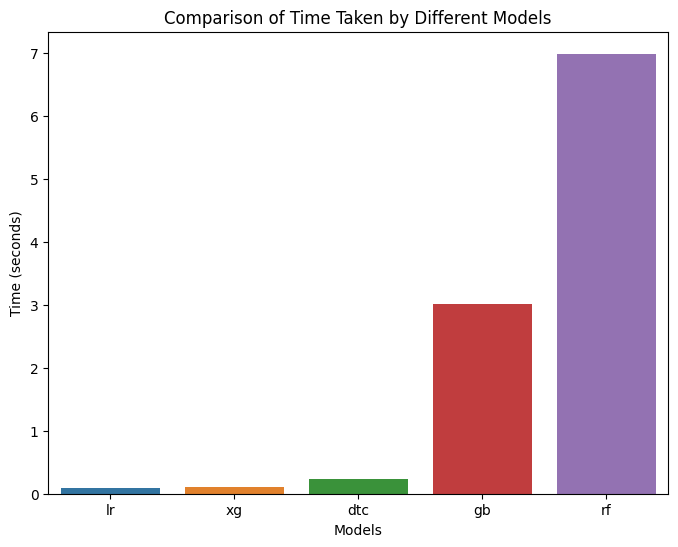

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='Time (in s)', data=res, order=res.sort_values('Time (in s)', ascending=True)['Models'])

plt.title('Comparison of Time Taken by Different Models')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')

plt.show()

Training time is an important metric to consider when building a machine learning model. The two main reasons are:

- **Cost**: Training time is often directly related to computational costs. Models that require less training time can be more cost-effective to run, especially in cloud environments where resources are billed based on usage.

- **Responsiveness**: In some applications, the ability to train a model quickly is essential for reacting promptly to changes in data or the environment. This can be crucial in domains such as finance, healthcare, or cybersecurity.

At first glance, Gradient Boosting and Random Forest models may be at a disadvantage in this regard.

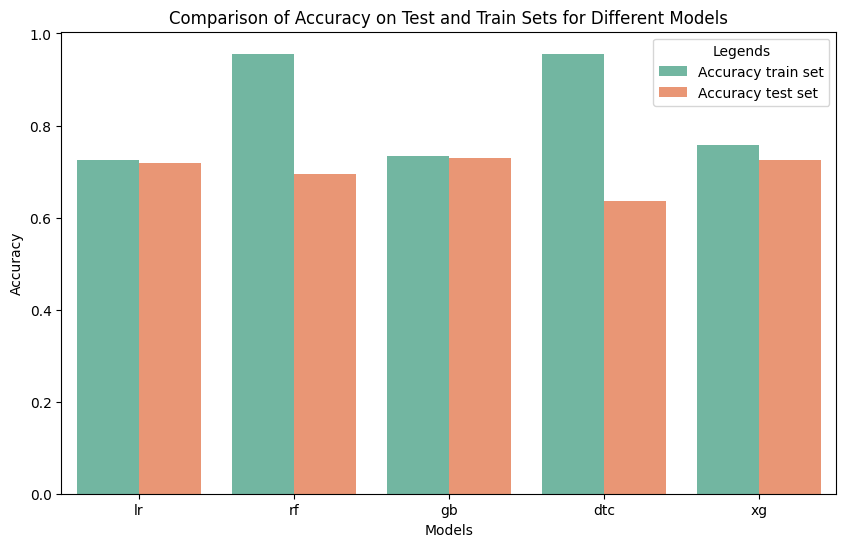

In [33]:
plt.figure(figsize=(10, 6))

# Use the melt function to reshape the data
melted_res = res.melt(id_vars='Models', value_vars=['Accuracy train set', 'Accuracy test set'],
                      var_name='Dataset', value_name='Accuracy')

# Create a barplot using the melted data structure
sns.barplot(x='Models', y='Accuracy', hue='Dataset', data=melted_res, palette='Set2')

plt.title('Comparison of Accuracy on Test and Train Sets for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(title='Legends', loc='upper right')

plt.show()


Using this graph, we can observe that the Random Forest and Decision Tree models exhibit high **variance** (difference in accuracy between the train set and the test set). This could be an indication of **overfitting**, where the model becomes too specialized in the training data and struggles to make accurate predictions on other examples. To address this issue, one should consider obtaining more data or implementing regularization techniques. It's also worth noting that these are the two models with the lowest accuracy on the test set.

In general, the obtained accuracies with our models do not seem very conclusive. Assuming the Bayes error, i.e., the smallest theoretically possible error rate, is close to 0%, which is plausible in the context of a group of expert doctors detecting heart disease, our models' accuracy does not appear to exceed 75%, significantly deviating from the Bayes error. This suggests a potential **bias** issue. To address this problem, one could explore implementing more sophisticated or optimized models.

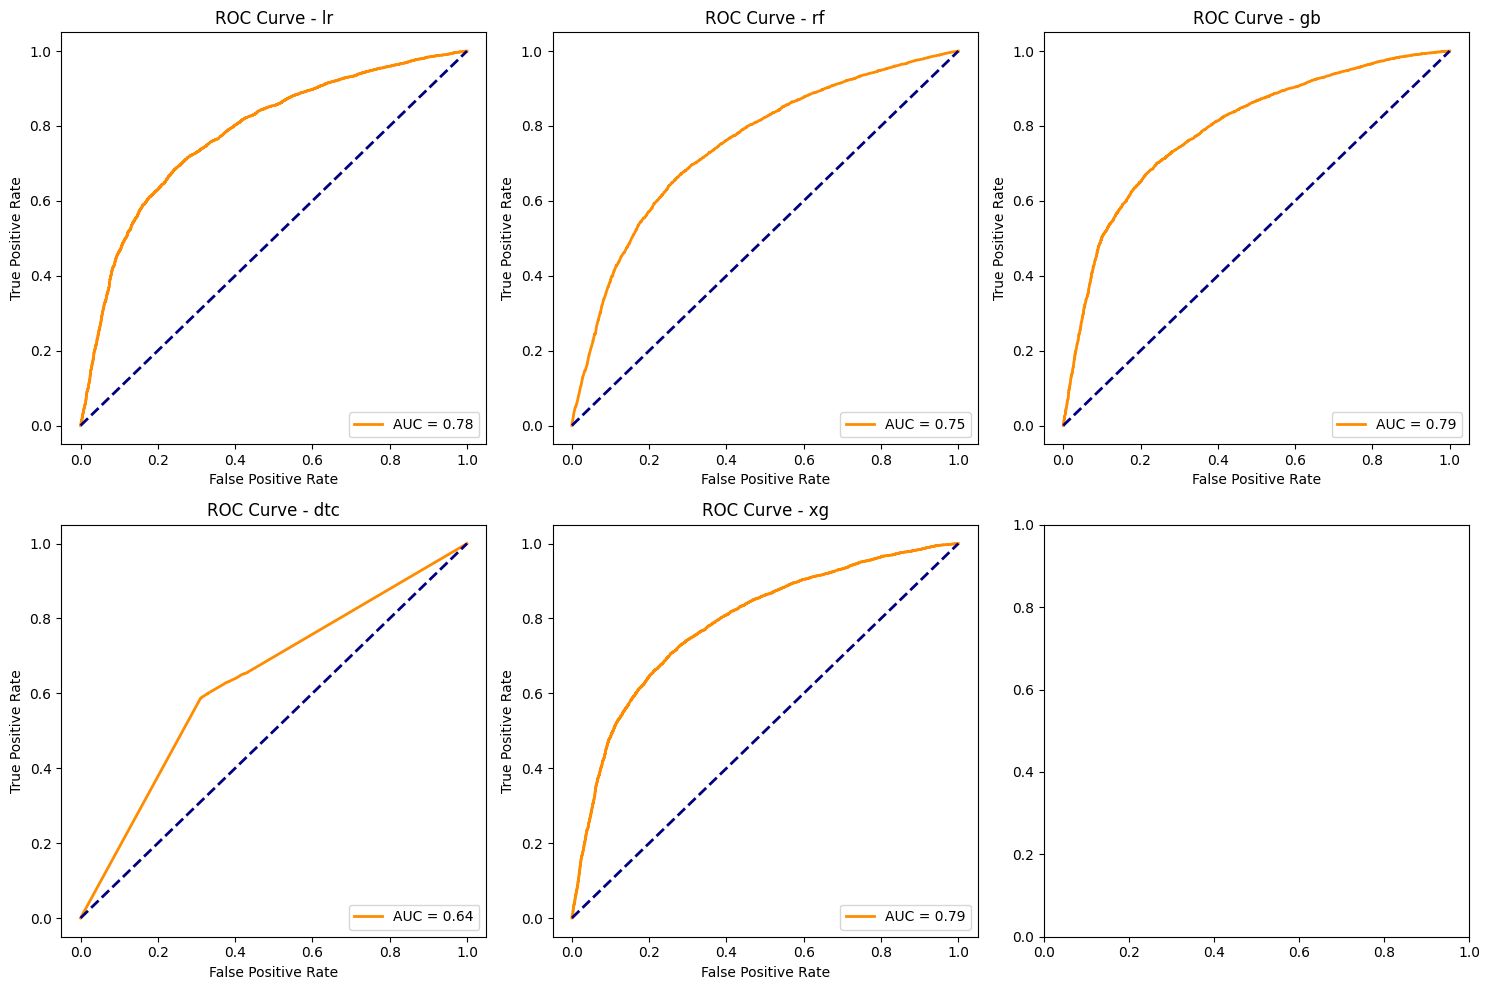

In [32]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(model_dict.items()):
    # Make the prediction on the test set
    yhat_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, yhat_test_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_title(f'ROC Curve - {name}')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].legend(loc='lower right')

plt.tight_layout()
plt.show()

The construction of the ROC curve involves plotting the false positive rate on the x-axis and the true positive rate on the y-axis. This process generates a graphical representation of a model's ability to discriminate between positive and negative instances. The Area Under the Curve (AUC) is a comprehensive metric for overall model performance, with a perfect model having an AUC of 1 and a model equivalent to random chance having an AUC of 0.5.

The ideal positioning on the ROC curve is in the upper-left corner, where the true positive rate is high, and the false positive rate is low. The diagonal line from (0,0) to (1,1) represents the performance of a random model. Models that approach the upper-left corner have better overall performance, striking a balance between sensitivity and specificity. The ROC curve provides valuable insights into a classifier's discriminatory power and helps in selecting appropriate classification thresholds based on specific application requirements.

Here, we can conclude that the XGBoost and Gradient Boosting models have the best results with an AUC of 0.79.

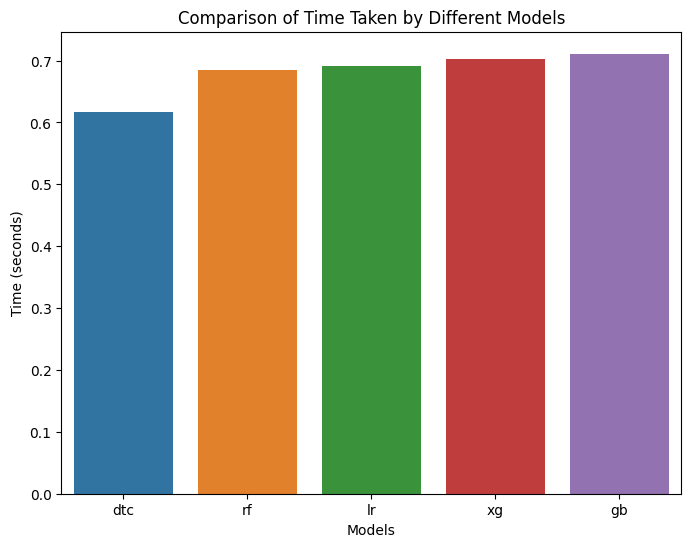

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='F1 score', data=res, order=res.sort_values('F1 score', ascending=True)['Models'])

plt.title('Comparison of Time Taken by Different Models')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')

plt.show()

**F1 Score:**

The F1 score is a performance metric for a classification model that combines precision and recall into a single value into a harmonic mean. It is particularly useful when dealing with imbalanced classes.

**Formula:**
$$\ F1 = \frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}} \$$

1. **Precision:**
   - Precision measures the number of true positives among all examples classified as positive by the model. The precision formula is $$\frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

2. **Recall:**
   - Recall (Sensitivity) measures the number of true positives among all truly positive examples. The recall formula is $$\frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

**Interpretation:**
- The F1 score balances precision and recall, providing a comprehensive measure of a model's performance.
- It reaches its maximum value of 1 when both precision and recall are perfect (100%), indicating an ideal model.
- A higher F1 score indicates a better balance between precision and recall.
- Particularly useful in scenarios with imbalanced classes, preventing a dominant class from overshadowing the metric.
- A F1 score of 0 indicates poor model performance in terms of precision, recall, or both.
- Often used in situations where false positives and false negatives have significant consequences and need to be balanced.


According to the graph, it is evident that XGBoost and Gradient Boosting exhibit the highest F1 scores among the evaluated models.

## **Conclusion**

Sans trop de surprise tant il est un des plus performants en compétition, le modèle le plus approprié pour notre problème est XGBoost. Il est celui qui met le moins de temps à l'entrainement et qui a les meilleurs résultats (précision, AUC, F1 score). 

Toutefois, nous sommes loin d'avoir obtenus les résultats les plus probants. Afin de les améliorer, nous suggérons un tuning plus approfondi des paramètres du modèle. Voici une liste de paramètre sur lesquels nous pouvons travailler : 

- **learning_rate** : Il contrôle la contribution de chaque arbre à la mise à jour du modèle. Un taux d'apprentissage plus faible nécessite plus d'arbres pour atteindre la même performance, mais peut améliorer la généralisation.
- **n_estimators** : Le nombre d'arbres dans l'ensemble. Un nombre plus élevé d'arbres augmente la complexité du modèle, mais peut aussi conduire à un surajustement. Trouvez un compromis en ajustant ce paramètre.
- **max_depth** : La profondeur maximale de chaque arbre. Contrôler la profondeur peut aider à prévenir le surajustement. Plus la profondeur est grande, plus le modèle est complexe.
- **min_child_weight** : Le poids minimum nécessaire pour créer une nouvelle partition dans un nœud de l'arbre. Cela peut être utilisé pour contrôler la sensibilité du modèle au bruit ou aux valeurs aberrantes.
- **subsample** : La proportion d'échantillons d'entraînement utilisée pour ajuster chaque arbre. Une valeur inférieure peut rendre le modèle plus robuste envers le surajustement.
- **colsample_bytree** : La proportion de fonctionnalités (colonnes) à considérer lors de la création de chaque arbre. Cela peut introduire de la variabilité entre les arbres et améliorer la généralisation.
- **gamma** : Un terme de régularisation qui contrôle si un nœud doit être partitionné. Une valeur plus élevée peut conduire à une régularisation plus forte.
- **lambda** (L2 regularization) et alpha (L1 regularization) : Ces paramètres contrôlent la régularisation pour éviter le surajustement. Lambda contrôle la régularisation L2, et alpha contrôle la régularisation L1.
- **scale_pos_weight** : Utile dans les problèmes de classification binaire avec un déséquilibre de classe. Il peut aider à donner plus de poids aux exemples de la classe minoritaire.